In [1]:
import mlgrad.funcs as funcs
import mlgrad.cls.cls_pca as cls_pca

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [2]:
X, Y = load_iris(return_X_y=True)
X2 = X[Y != 0]
Y2 = Y[Y != 0]

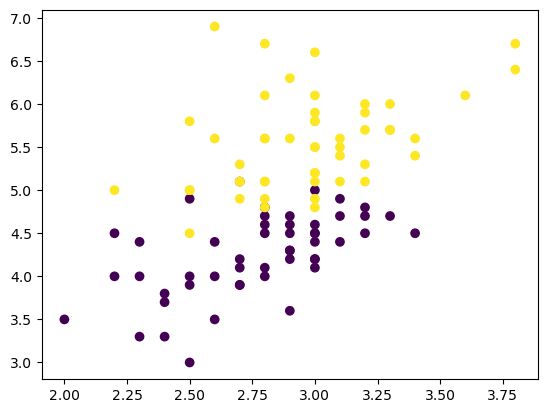

In [3]:
plt.scatter(X2[:,1], X2[:,2], c=Y2)
plt.show()

In [4]:
alg = cls_pca.CLS_PC(funcs.Hinge(0.0))

In [5]:
alg.fit(X2, Y2, n_pc=2)

[[ 0.702 -0.619 -0.351  0.027]
 [-0.447 -0.556  0.397 -0.577]] [0.333 0.021]


ValueError: operands could not be broadcast together with shapes (2,3) (1,4) (2,3) 

In [ ]:
plt.plot(alg.qvals)
plt.show()

In [ ]:
U = X2 @ alg.A[:,1:].T

In [ ]:
plt.scatter(U[:,0], U[:,1], c=Y2)
plt.show()

In [ ]:
plt.scatter(range(len(X2)), alg.evaluate(X2), c=Y2)
plt.show()